# Week 2 
## Introduction to Solid State 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import MSD as msd

from scipy import stats


def get_diffusion(file, atom):
    
    with open(file) as f:
        y = False
        for line in f:
            if str("atom        D ") in line:
                y = True
            if y == True and str(atom) in line:
                d = line.split()
                break
    return d

Now that you are familiar with molecular dynamics, you are now going to use it to tackle some real world problems. In the next three weeks you will investigate the transport properties of a simple fluorite material - Ca$F_2$. The transport properties of a material determine many properties that are utilised for modern technological applications. For example, solid oxide fuel cell (SOFCs - Alternative to batteries) materials are dependent on the movement of charge carriers through the solid electrolyte and  nuclear fuel materials oxidise and fall apart and this corrosive behaviour is dependent on the diffusion of oxygen into the lattice. Due to the importance of the transport properties of these materials, scientists and engineers spend large amounts of their time tring to optomise these properties using different stoichiometries, introducing defects and by using different syntheisis techniques. Over the next three weeks you will investigate how the transport properties of Ca$F_2$ are affected by temperature, structural defects (Schottky and Frenkel) and by chemcial dopants (e.g. different cations). A rough breakdown looks as follows
- Week 2 
    - Introduction to DL_POLY
    - Tutorial on the calculation of diffusion coefficients
    - Tutorial on the Arhennius equation
    - Molecular dynamics simulations of stoichiomteric Ca$F_2$
- Week 3 
    - Frenkel and Schottky defects
- Week 4 
    - Dopants
    


## Introduction to DL_POLY

DL_POLY is a molecular dynamics program maintained by Daresbury laboratories. In contrast to pylj, DL_POLY is a three dimensional molecular dynamics code that is used worldwide by computational scientists for molecular simulation, but it should be noted that the theory is exactly the same and any understanding gained from pylj is completely applicable to DL_POLY. For the next three weeks you will use DL_POLY to run short molecular dynamics simulations on Ca$F_2$. You first need to understand the input files required for DL_POLY. 
- CONTROL - This is the file that contains all of the simulation parameters, e.g. simulation temperature, pressure, number of steps e.t.c
- CONFIG - This is the file that contains the structure - i.e. the atomic coordinates of each atom. 
- FIELD - This is the file that contains the force field or potential model e.g. Lennard Jones. 

Contained within the folder "Input" you will find a file called input.txt. This is the main file that you will interact with over the next three weeks and is used to generate the FIELD, CONTROL and CONFIG. Essentially it is easier to meddle with input.txt than it is to meddle with the 3 DL_POLY files everytime you want to change something. To run metadise we will use the subprocess python module. You specify what program you want to run and the file that you want to run it in, you will need to ensure the file path is correct.

In [3]:
subprocess.call('H:/Third_year_lab/Advanced_Practical_Chemistry_Teaching-master/progs/metadise.exe', cwd='H:/Third_year_lab/Advanced_Practical_Chemistry_Teaching-master/course/week_2/Input/')
os.rename('Input/control_o0001.dlp', 'Input/CONTROL')
os.rename('Input/config__o0001.dlp', 'Input/CONFIG')
os.rename('Input/field___o0001.dlp', 'Input/FIELD')

Now you should have a CONFIG, CONTROL and FIELD file within the input directory. In theory you could just call the DL_POLY program on this directory and your simulation would run. However we need to tweak the CONTROL file in order to set up our desired simulation. Make a new subdirectory in the week 2 directory named "Example" and copy CONFIG, CONTROL and FIELD to that subdirectory. Now edit the CONTROL file.  

We want to change the following   

`Temperature 300 ---> Temperature 1500`  
`Steps 5001 ---> Steps 40000`  
`ensemble nve ---> ensemble npt hoover 0.1 0.5`  
`trajectory nstraj= 1    istraj=   250 keytrj=0 ---> trajectory nstraj= 0    istraj= 100  keytrj=0`  
  
Now your simulation is ready. As a point of interest it is always good to check your structure before and after the simulation. You can view the CONFIG file in three dimensions using the VESTA program. It is available for free at http://www.jp-minerals.org/vesta/en/download.html . Download it and use it to view your CONFIG, a demonstrator can help if necessary. VESTA can generate nice pictures which will look very good in a lab report. 

<center>
    <br>
    <img src="./figures/vesta.png\" width=\"400px\">
    <i>Figure 1. Fluorite Ca$F_2$ unit cell visualised in VESTA.</i>
    <br>
</center>


To run DL_POLY from within a notebook use the below command. Keep in mind that this simulation will take 20 or so minutes so be patient. 

In [5]:
subprocess.call('H:/Third_year_lab/Advanced_Practical_Chemistry_Teaching-master/progs/dlpoly_classic.exe', cwd='H:/Third_year_lab/Advanced_Practical_Chemistry_Teaching-master/course/week_2/Example/')

0

Once DL_POLY has completed you will find several files relating to your simulaton. 
- HISTORY - This file contains the configuration of your system at each step during the simulation. You can view this as a movie using the VMD program - Ask a demonstrator for details
- REVCON - This is the configuration at the end of the simulation - Can be viewed in VESTA - why not check to see how it has changed. 
- STATIS - Contains the stats at each step in the simulation. 
- OUTPUT - Contains properties 

It is now important to understand how we can actually use the details of the simulation to get some information on the properties of the material, e.g. Diffusion coefficients and activation energies. 

## Mean Squared Displacements - Calculating diffusion coefficients

As we have seen molecules in liquds, gases and solids do not stay in the same place and move constantly. Think about a drop of dye in a glass of water, as time passes the dye distributes throughout the water. This process is called diffusion and is common throughout nature.  

Using the dye as an example, the motion of a dye molecule is not simple. As it moves it is jostled by collisions with other molecules, preventing it from moving in a straight path. If the path is examined in close detail, it will be seen to be a good approximation to a random walk. In mathmatics a random walk is a series of steps, each taken in a random direction. This was analysed by Albert Einstein in a study of Brownian motion and he showed that the mean square of the distance travelled by a particle following a random walk is proportional to the time elapsed. 
\begin{align}
\Big \langle r^2 \big \rangle & = 6 D_t + C 
\end{align}

where $\Big \langle r^2 \big \rangle$ is the mean squared distance, t is time, D is the diffusion rate and C is a constant. 

## What is the mean squared displacement

Going back to the example of the dye in water, lets assume for the sake of simplicity that we are in one dimension. Each step can either be forwards or backwards and we cannot predict which. From a given starting position, what distance is our dye molecule likely to travel after 1000 steps? This can be determined simply by adding together the steps, taking into account the fact that steps backwards subtract from the total, while steps forward add to the total. Since both forward and backward steps are equally probable, we come to the surprising conclusion that the probable distance travelled sums up to zero.

By adding the square of the distance we will always be adding positive numbers to our total which now increases linearly with time. Based upon equation 1 it should now be clear that a plot of $\Big \langle r^2 \big \rangle$ vs time with produce a line, the gradient of which is equal to 6D. Giving us direct access to the diffusion coefficient of the system. 

Lets try explore this with an example. Run a short DL_POLY simulation on the input files provided. 

You will a small MSD program called MSD.py to analyse your simulation results. First you need to read in the data, the HISTORY file contains a list of the atomic coordiantes held by the atoms during the simulation. 

In [6]:
# Read in the HISTORY file

## Provide the path to the simulation and the atom that you want data for.
data = msd.read_history("Example/HISTORY", "F")

data is a dictionary variable containing the atomic trajectories, lattice vectors, total number of atoms, and total number of timesteps. 

data = {'trajectories':trajectories, 'lv':lv, 'timesteps':timesteps, 'natoms':natoms}

The next step is to calculate the MSD. 

In [7]:
# Run the MSD calculation
msd_data = msd.run_msd(data)

run_msd returns a dictionary containing the total MSD, the dimensional MSD values and the time. 
msd_data = {'msd': msd, 'xmsd': xmsd, 'ymsd': ymsd, 'zmsd': zmsd, 'time': time}

This can then be plotted to give a nice linear relationship. 

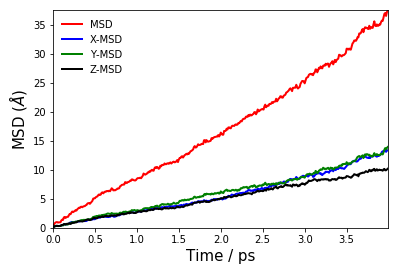

In [8]:
plt.plot(msd_data['time'], msd_data['msd'], lw=2, color="red", label="MSD")
plt.plot(msd_data['time'], msd_data['xmsd'], lw=2, color="blue", label="X-MSD")
plt.plot(msd_data['time'], msd_data['ymsd'], lw=2, color="green", label="Y-MSD")
plt.plot(msd_data['time'], msd_data['zmsd'], lw=2, color="black", label="Z-MSD")

plt.ylabel("MSD (" r'$\AA$' ")", fontsize=15)
plt.xlabel("Time / ps", fontsize=15)
plt.ylim(0, np.amax(msd_data['msd']))
plt.xlim(0, np.amax(msd_data['time']))
plt.legend(loc=2, frameon=False)
plt.show()

To calculate the gradient we need to perform a linear regression on the data. 

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(msd_data['time'], msd_data['msd'])

The gradient is equal to 6D (6 = dimensionality). So our final diffusion coefficient for the simulation is given by

In [10]:
diffusion_coefficient = (np.average(slope) / 6) 
print("Diffusion Coefficient: ", diffusion_coefficient, " X 10 ^-9 (m^-2)")

Diffusion Coefficient:  1.4550282026323467  X 10 ^-9 (m^-2)


## Simulation Length

It is important to consider the lenght of your simulation (Number of steps). Create a new folder called "Example_2", copy the CONFIG, FIELD and CONTROL files from your previous simulation but this time change the number of steps to 10000. Now rerun the simulation.

In [11]:
subprocess.call('H:/Third_year_lab/Advanced_Practical_Chemistry_Teaching-master/progs/dlpoly_classic.exe', cwd='H:/Third_year_lab/Advanced_Practical_Chemistry_Teaching-master/course/week_2/Example_2/')

0

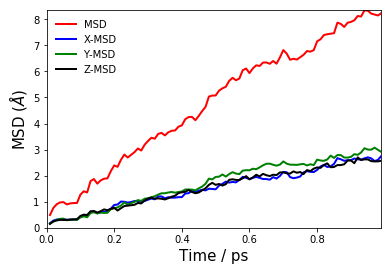

In [12]:
data = msd.read_history("Example_2/HISTORY", "F")
msd_data = msd.run_msd(data)

plt.plot(msd_data['time'], msd_data['msd'], lw=2, color="red", label="MSD")
plt.plot(msd_data['time'], msd_data['xmsd'], lw=2, color="blue", label="X-MSD")
plt.plot(msd_data['time'], msd_data['ymsd'], lw=2, color="green", label="Y-MSD")
plt.plot(msd_data['time'], msd_data['zmsd'], lw=2, color="black", label="Z-MSD")

plt.ylabel("MSD (" r'$\AA$' ")", fontsize=15)
plt.xlabel("Time / ps", fontsize=15)
plt.ylim(0, np.amax(msd_data['msd']))
plt.xlim(0, np.amax(msd_data['time']))
plt.legend(loc=2, frameon=False)
plt.show()

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(msd_data['time'], msd_data['msd'])

diffusion_coefficient = (np.average(slope) / 6) 
print("Diffusion Coefficient: ", diffusion_coefficient, " X 10 ^-9 (m^-2)")

Diffusion Coefficient:  1.3602930070828145  X 10 ^-9 (m^-2)


You will hopefully see that your MSD plot has become considerably less linear. This shows that your simulation has not run long enough and your results will be unrealiable. You will hopefully also see a change to the value of your diffusion coefficient.  The length of your simulation is something that you should keep in mind for the next 3 weeks. 

## Arrhenius

The next thing is to use the diffusion coefficients to calcaulte the activation energy for F diffusion. This rea=quires diffusion coefficients from a temperature range. Common sense and chemical intuition suggest that the higher the temperature, the faster a given chemical reaction will proceed. Quantitatively this relationship between the rate a reaction proceeds and its temperature is determined by the Arrhenius Equation. At higher temperatures, the probability that two molecules will collide is higher. This higher collision rate results in a higher kinetic energy, which has an effect on the activation energy of the reaction. The activation energy is the amount of energy required to ensure that a reaction happens.  
  
\begin{align}
k = A * e^{(-Ea / RT)}
\end{align}
  
where k is the rate coefficient, A is a constant, Ea is the activation energy, R is the universal gas constant, and T is the temperature (in kelvin).



## Week 2 Exercise

Using what you have learned over the last 45 mins your task this week is to calculate the activation energy of F diffusion in Ca$F_2$. You will need to select a temperature range and carry out simulations at different temperatures within that range. 
#### Questions to answer
- In what temperature range is Ca$F_2$ completely solid i.e. no diffusion?
- In what range is fluorine essentially liquid i.e. fluorine diffusion with no calcium diffusion?
- What is the melting temperature?
- Plot an Arrhenius plot and determine the activation energies in temperature range - You will need to rearange the equation. 


You are encouraged to split the work up within your group and to learn how to view the simulation "movie" using VMD (Ask a demonstrator). VMD is a fantastic program that allows you to visualise your simulation, included below is a video showing a short snippet of an MD simulation of Ca$F_2$. A single F atom has been highlighted to show that diffusion is occuring. 

In [14]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./figures/VMD_example.mp4" type="video/mp4">
</video></div>

Furthermore, VMD can also be used to generate images showing the entire trajectory of the simulation, e.g.



<center>
    <br>
    <img src="./figures/CaF2.png\" width=\"400px\">
    <i>Figure 2. A figure showing all positions occupied by F during an MD simulation at 1500 K. F positions are shown in orange and Ca atoms are shown in green.</i>
    <br>
</center>
  

  To save you the time you can use the function declared at the start of this notebook to pull out a diffusion coefficient directly from the simulation output file. MSD.py is a small code to allow visualisation of the MSD plot but it is not neccesary every time you want the diffusion coefficient. 

It is up to you how you organise/create your directories but it is reccomended that you start a new notebook. Use the commands/functions used in this notebook to generate your input files, run DL_POLY and extract the diffusion coefficients. The write your own code to generate an Arrhenius plot and calculate the activation energies. 
If you finish early then feel free to start week 3. 